# Linear Regression on MNIST Data
### 1 vs 5 Classification

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linear_regression import LinearRegression


Helper Functions

In [2]:
def symmetry(input):
    """
    compute average symmetry value score for each image
    """
    flipped = np.flip(input,axis=1)
    matching = np.abs(input-flipped)
    return np.mean(matching, axis=1)

def intensity(input):
    """
    compute average intensity value score for each image
    """
    return np.mean(input, axis=1)


Import Training Data

In [3]:
path = "Data/train_pr4.csv"
data = pd.read_csv(path)
X = np.array(data)[:,1:]         # features
y = np.array(data)[:,0]          # labels
y[y==5]=-1


Convert Feature data to Symmetry and Intensity Scores

In [4]:
# convert default feature information to intensity and symmetry scores
x_int = intensity(X).reshape(X.shape[0],1)
x_sym = symmetry(X).reshape(X.shape[0],1)

# split data - +1 and -1
xp1, xp2 = x_int[np.where(y==1)],x_sym[np.where(y==1)]
xn1, xn2 = x_int[np.where(y==-1)],x_sym[np.where(y==-1)]

# training data - features and labels
x_train = np.hstack((x_int, x_sym))   
y_train = y


Visualize Training Data

Text(0.5, 1.0, 'Training Data Set')

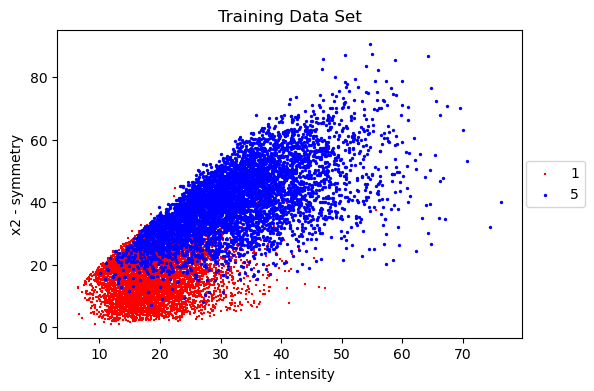

In [5]:
# plot the dataset
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)

# plot +1 and -1 labelled data
plt.scatter(xp1,xp2,c='r',label='1',marker='+', s=2)
plt.scatter(xn1,xn2,c='b',label='5',marker='o', s=2)

# general plot formatting
plt.legend(['1', '5'],  loc='center right', bbox_to_anchor=(1.15,0.5))
plt.xlabel("x1 - intensity")
plt.ylabel("x2 - symmetry")
plt.title("Training Data Set")

### Linear Classifier on Training Data

Weights -->  [ 1.71507208 -0.01726074 -0.04235685]


Text(0.5, 1.0, 'Linear Regression Classifier')

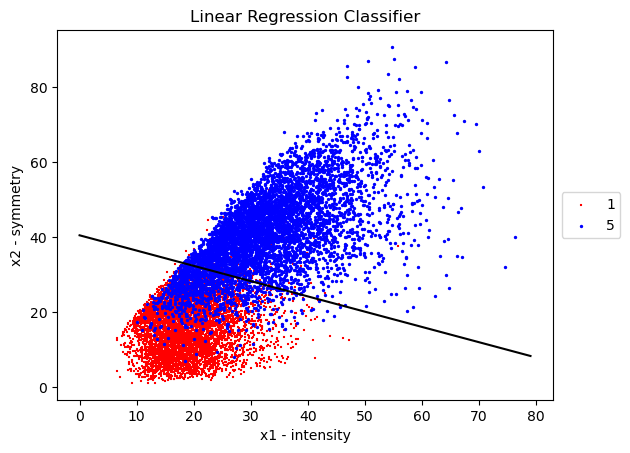

In [6]:
regressor = LinearRegression()
w = regressor.fit(x_train,y_train)

print("Weights --> ", w)

x_input = np.arange(0,80)
y_input = -w[1]/w[2]*x_input - w[0]/w[2]

plt.figure()

# plot +1 and -1 labelled data
plt.scatter(xp1,xp2,c='r',label='1',marker='+', s=2)
plt.scatter(xn1,xn2,c='b',label='5',marker='o', s=2)

# general plot formatting
plt.legend(['1', '5'],  loc='center right', bbox_to_anchor=(1.15,0.5))

plt.plot(x_input, y_input, c ='k')

plt.xlabel("x1 - intensity")
plt.ylabel("x2 - symmetry")
plt.title("Linear Regression Classifier")

### Linear Classifier on Test Data

Text(0.5, 1.0, 'Linear Regression Classifier')

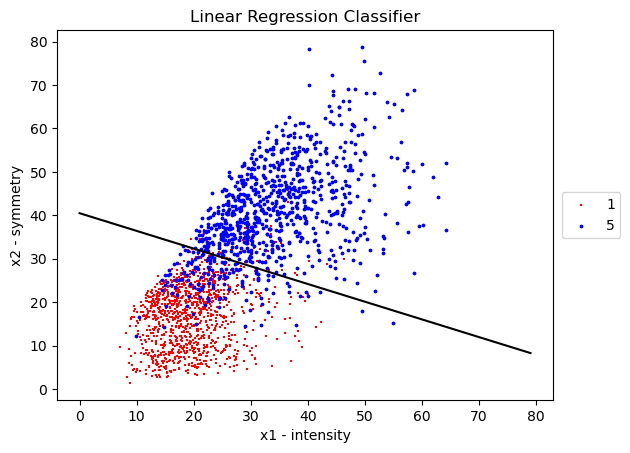

In [7]:
path = "Data/test_pr4.csv"
data = pd.read_csv(path)
X = np.array(data)[:,1:]         # features
y = np.array(data)[:,0]          # labels
y[y==5]=-1

# convert default feature information to intensity and symmetry scores
x_int = intensity(X).reshape(X.shape[0],1)
x_sym = symmetry(X).reshape(X.shape[0],1)

# split data - +1 and -1
xp1, xp2 = x_int[np.where(y==1)],x_sym[np.where(y==1)]
xn1, xn2 = x_int[np.where(y==-1)],x_sym[np.where(y==-1)]

plt.figure()

# plot +1 and -1 labelled data
plt.scatter(xp1,xp2,c='r',label='1',marker='+', s=3)
plt.scatter(xn1,xn2,c='b',label='5',marker='o', s=3)

# general plot formatting
plt.legend(['1', '5'],  loc='center right', bbox_to_anchor=(1.15,0.5))

plt.plot(x_input, y_input, c ='k')

plt.xlabel("x1 - intensity")
plt.ylabel("x2 - symmetry")
plt.title("Linear Regression Classifier")